In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [2]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/U_matrix", "r") as file:
    U = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/V_matrix", "r") as file:
    V = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/M_matrix", "r") as file:
    M = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/xgrid_matrix", "r") as file:
    xgrid = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/v1_slice3/fftcc_corr_alg_no_post/ygrid_matrix", "r") as file:
    ygrid = file["matrix"][:]

In [3]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/headon_layer_3_v1.h5", "r") as file:
    slices = file["data"][:]

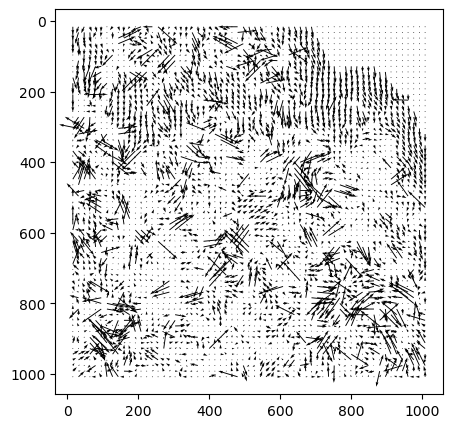

In [5]:
t = 150

plt.figure(figsize=(5, 5))
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=200)
plt.gca().invert_yaxis()
plt.show()

## Averaging of vector fields over sliding intervals.

In [18]:
import sys

In [15]:
len(U)

394

In [4]:
d = sum(U[1:3]) == U[1] + U[2]
d.all()

True

In [9]:
np.median(U[1:3], axis=0)

array([[ 0.       ,  0.       ,  0.       , ...,  5.5      ,  3.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  4.833383 ,  3.9425526,
        -4.6125584],
       [ 0.       ,  0.       ,  0.       , ...,  4.536204 ,  3.8610892,
        -2.865567 ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  4.1871605,  3.8687038,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  2.8700166,  2.527742 ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  3.       ,  2.5      ,
         0.       ]], dtype=float32)

In [29]:
np.sqrt(U[1]**2 + V[1]**2)

array([[ 0.       ,  0.       ,  0.       , ...,  6.       ,  4.       ,
         1.       ],
       [ 0.       ,  0.       ,  0.       , ...,  5.790344 ,  5.6935587,
        13.231027 ],
       [ 0.       ,  0.       ,  0.       , ...,  5.802747 ,  5.565139 ,
         9.722083 ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  6.052353 ,  4.155333 ,
         2.       ],
       [ 0.       ,  0.       ,  0.       , ...,  3.1083114,  3.1774354,
         3.       ],
       [ 0.       ,  0.       ,  0.       , ...,  2.       ,  2.       ,
         0.       ]], dtype=float32)

In [4]:
def vector_avg(U, V, M, t, interval):
    # Compute the averaging vectors and their magnitudes at time t. 

    if t < interval:
        U_mid = np.median(U[0 : t+interval+1], axis = 0)
        V_mid = np.median(V[0 : t+interval+1], axis = 0)
        # U_mid = np.mean(U[0:t+interval+1], axis = 0)
        # V_mid = np.mean(V[0:t+interval+1], axis = 0)
        print("1")
    elif len(U)-t < interval:
        U_mid = np.median(U[t-interval : len(U)+1], axis = 0)
        V_mid = np.median(V[t-interval : len(U)+1], axis = 0)
        # U_mid = np.mean(U[t-interval:len(U)+1], axis = 0)
        # V_mid = np.mean(V[t-interval:len(U)+1], axis = 0)
        print("2")
    else:
        U_mid = np.median(U[t-interval : t+interval+1], axis = 0)
        V_mid = np.median(V[t-interval : t+interval+1], axis = 0)
        # U_mid = np.median(U[t-interval : t+interval+1], axis = 0)
        # V_mid = np.median(V[t-interval : t+interval+1], axis = 0)
        print("3")

    # Update the M (magnitude matrix)
    M_mid = np.sqrt(U_mid**2 + V_mid**2)
        
    return U_mid, V_mid, M_mid

1


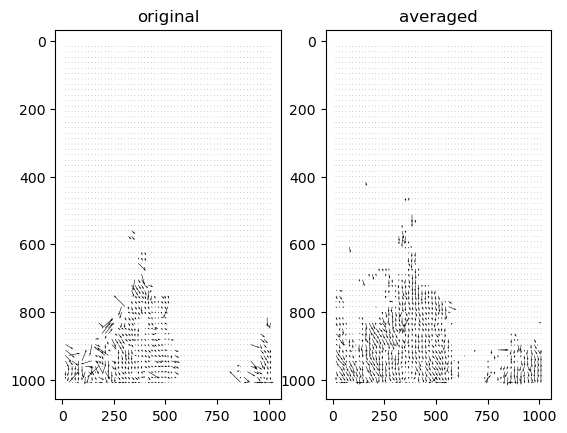

In [9]:
t = 0
U_test, V_test, M_test = vector_avg(U, V, M, t, 5)

plt.subplot(1, 2, 1)
plt.title("original")
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=200)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.title("averaged")
plt.quiver(xgrid[t], ygrid[t], V_test, -U_test, scale=150)
plt.gca().invert_yaxis()
plt.show()


## Filter out the extra long vectors
Depending on the vector length how many times of std above the mean length. 

In [5]:
def postprocess(U, V, M, std_factor):
    # Defining the mask.
    meanM = np.mean(M)
    stdM = np.std(M)
    mask = M < meanM + std_factor * stdM
    M *= mask
    # filter the U, V vector components depending on masked M.
    U[M == 0] = "nan"
    V[M == 0] = "nan"
    return U, V, M

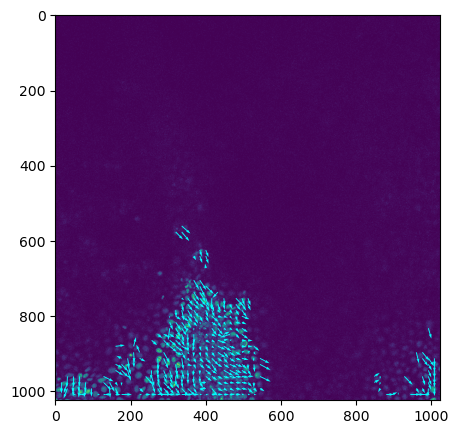

In [9]:
t = 0

U_t, V_t, M_t = postprocess(U[t], V[t], M[t], 3)

plt.figure(figsize=(5, 5))
plt.imshow(slices[t].T)
plt.quiver(xgrid[t], ygrid[t], V_t, -U_t, scale=150, color = "aqua")
#plt.gca().invert_yaxis()
plt.show()

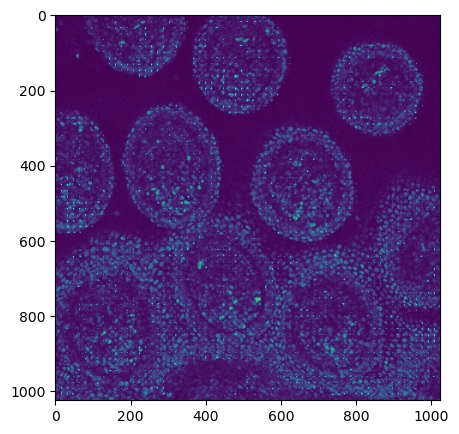

In [42]:
U_post, V_post, M_post = postprocess(U_test, V_test, M_test, 5)

plt.figure(figsize=(5, 5))
plt.imshow(slices[t].T)
plt.quiver(xgrid[t], ygrid[t], V_post, -U_post, scale=150, color = "aqua")
#plt.gca().invert_yaxis()
plt.show()

## Firstly averaging then postprocessing. Make video.

1
ha
1
ha
1
ha
1
ha
1
ha
1
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha
3
ha


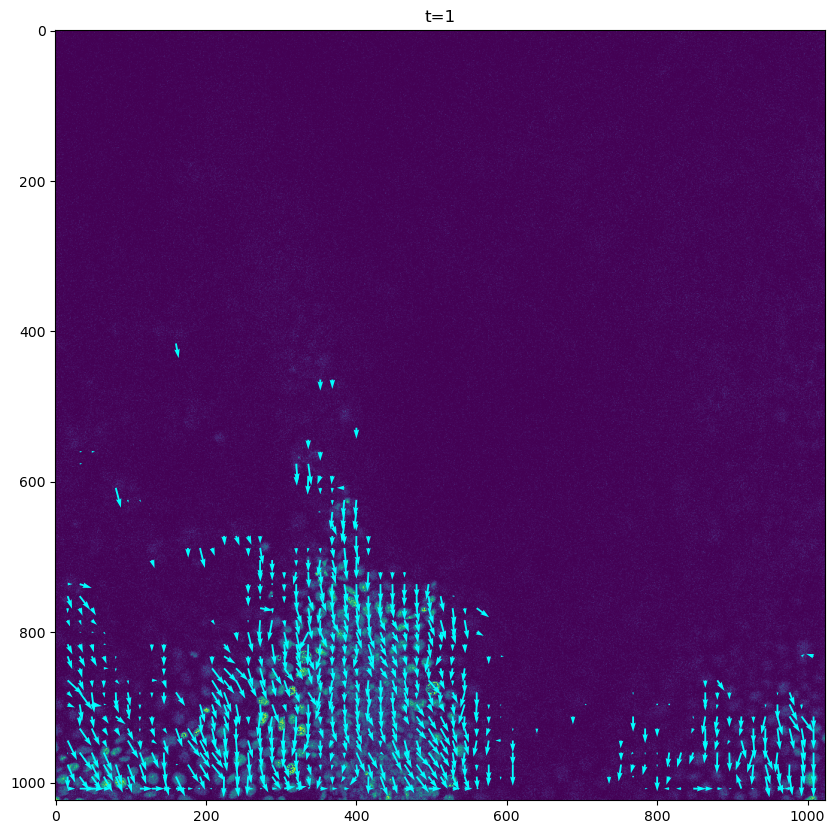

In [6]:
fig = plt.figure(figsize = (10, 10))
x = xgrid[0]
y = ygrid[0]

def make_frame(i):
    plt.clf()

    # Averaging
    U_avg, V_avg, M_avg = vector_avg(U, V, M, i, 5)
    # Postprocessing.
    U_post, V_post, _ = postprocess(U_avg, V_avg, M_avg, 3)
    # Plotting.
    plt.title("t="+str(i+1))
    plt.imshow(slices[i].T)
    plt.quiver(x, y, V_avg, -U_avg, scale=150, color = "aqua")
    #plt.gca().invert_yaxis()
    print("ha")

myanim = FuncAnimation(fig, make_frame, frames = len(U)-1, interval = 500)
myanim.save("avg_filter_backgr.mp4", writer="ffmpeg")

## Write the U, V, M in h5 files.

In [6]:
m_U = []
m_V = []
m_M = []

for i in range(len(U)):
    # Averaging
    U_avg, V_avg, M_avg = vector_avg(U, V, M, i, 5)
    # Postprocessing.
    U_post, V_post, M_post = postprocess(U_avg, V_avg, M_avg, 3)
    m_U.append(U_post)
    m_V.append(V_post)
    m_M.append(M_post)

# Write into h5 file.
U_avg = h5py.File("U_avg.h5", "w")
U_avg.create_dataset("matrix", data = m_U)
U_avg.close()

V_avg = h5py.File("V_avg.h5", "w")
V_avg.create_dataset("matrix", data = m_V)
V_avg.close()

M_avg = h5py.File("M_avg.h5", "w")
M_avg.create_dataset("matrix", data = m_M)
V_avg.close()

1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
